In [80]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
import json

In [ ]:
path = "/Users/suminbae/PycharmProjects/tf_cv2/aeye"
p_path = "/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons"



# basic functions

In [6]:

def get_model(layer='fc2'):
    """Keras Model of the VGG16 network, with the output layer set to `layer`.
    The default layer is the second-to-last fully connected layer 'fc2' of
    shape (4096,).
    Parameters
    ----------
    layer : str
        which layer to extract (must be of shape (None, X)), e.g. 'fc2', 'fc1'
        or 'flatten'
    """
    # base_model.summary():
    #     ....
    #     block5_conv4 (Conv2D)        (None, 15, 15, 512)       2359808
    #     _________________________________________________________________
    #     block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0
    #     _________________________________________________________________
    #     flatten (Flatten)            (None, 25088)             0
    #     _________________________________________________________________
    #     fc1 (Dense)                  (None, 4096)              102764544
    #     _________________________________________________________________
    #     fc2 (Dense)                  (None, 4096)              16781312
    #     _________________________________________________________________
    #     predictions (Dense)          (None, 1000)              4097000
    #
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

def get_images(path, filenames, target_size=(299, 299)):
    images = []
    for filename in filenames:
        img = Image.open(os.path.join(path, 'persons', filename))
        resized_img = img.resize(target_size)
        images.append([filename, np.array(resized_img)])

    return dict(images)
def feature_vectors(img_dict, model):
    f_vect = {}
    print('Feature extracting...')
    for fn, img in img_dict.items():
        if img.shape[2] == 1:
            img = img.repeat(3, axis=2)
        arr4d = np.expand_dims(img, axis=0) # (1, 224, 224, 3)
        arr4d_pp = preprocess_input(arr4d)
        f_vect[fn] = model.predict(arr4d_pp)[0, :]
    return f_vect

# calling model

In [7]:
model = get_model()

# preprocessing

In [14]:
#file name
filenames = os.listdir(os.path.join(path, 'persons'))

#각 사람별로 person10:ndarray 꼴
imgs_dict = get_images(path, filenames, target_size=(224, 224))




# img_feature_vector: 사람별 ndarray feature vector

In [15]:
#각 사람별로 person10 : feature vector
img_feature_vector = feature_vectors(imgs_dict, model)




Feature extracting...


# flatten 해주고 각 dict의 value만 :images

In [23]:
images = list(img_feature_vector.values())

# FNS: file 명들

In [26]:
fns = list(img_feature_vector.keys())

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++')

kmeans.fit(images)
y_kmeans = kmeans.predict(images)


In [30]:
file_names = list(imgs_dict.keys())

In [122]:
kmeans_labels_int = list(kmeans.labels_)

In [138]:
kmeans_labels_int = list(map(int, kmeans_labels_int))

In [142]:
kmeans_labels_int

[1, 2, 3, 3, 4, 0, 4, 1, 0, 3, 0, 1, 2, 1, 0, 0, 4, 1, 2, 1, 3, 3, 2, 1, 0, 1, 3, 0, 0, 0, 0, 0, 4, 2, 4, 2, 1, 1, 3, 3, 3, 3, 0, 0, 1, 1, 2, 4, 2, 1, 1, 0, 0, 4, 0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 0, 4, 2, 4, 2, 0, 0, 0, 0, 1, 1, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 1, 2, 4, 2, 4, 3, 3, 3, 1, 1, 1, 3, 0, 4, 4, 3, 3, 2, 2, 3, 1, 1, 4, 1, 0, 3, 0, 3, 0, 0, 3, 2, 2, 4, 3, 3, 1, 0, 3, 3, 1, 1, 1, 1, 4]

# groups가 최종 결과

In [32]:
groups = {}

for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# group fixed가 최종 결과 10/25 15:39

In [143]:
groups_fixed = {}

for file, cluster in zip(filenames,kmeans_labels_int):
    if cluster not in groups_fixed.keys():
        groups_fixed[cluster] = []
        groups_fixed[cluster].append(file)
    else:
        groups_fixed[cluster].append(file)

# group 1

In [129]:
g1 = groups[1]
g3 = groups[3]
g4 = groups[4]
g0 = groups[0]

In [149]:
g1 = groups_fixed[1]
g3 = groups_fixed[3]
g4 = groups_fixed[4]
g0 = groups_fixed[0]

/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_3.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_3.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_4_person_6.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_3_person_6.jpg


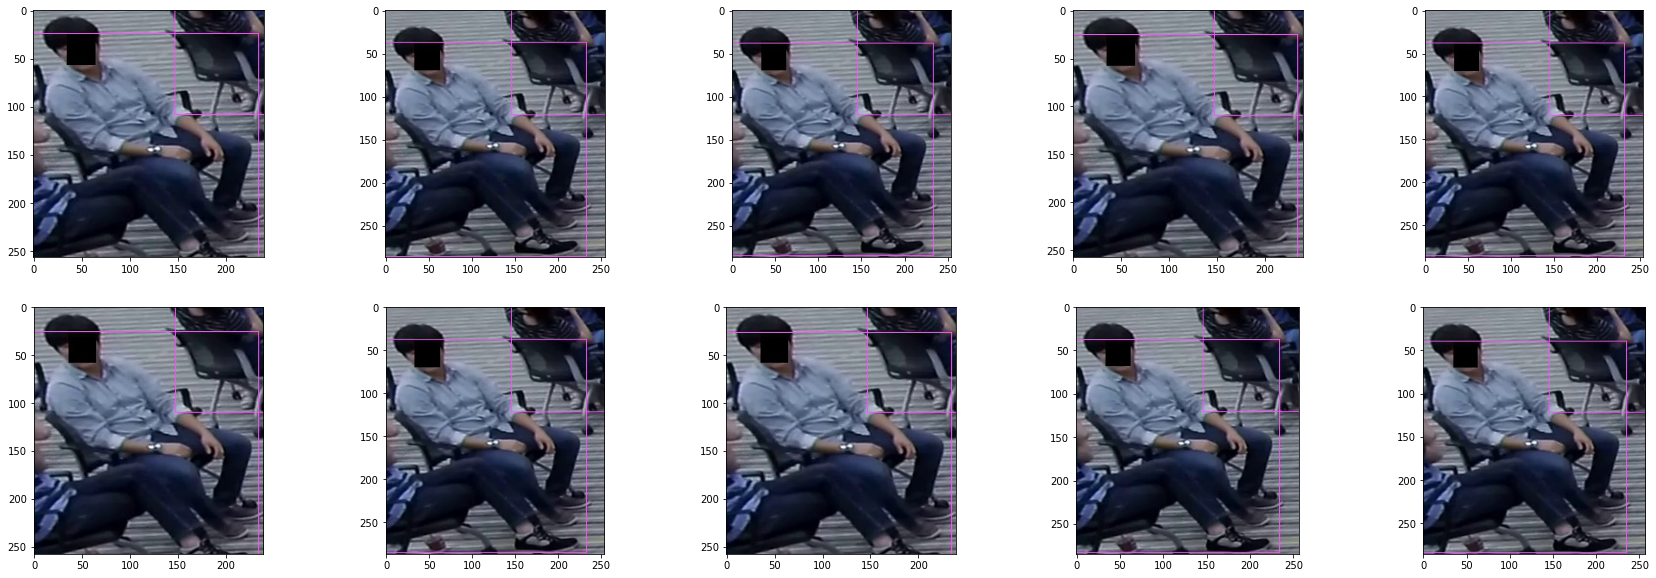

In [150]:
plt.figure(figsize=(30,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    data = p_path+"/"+g1[i]
    print(data)
    img = mpimg.imread(data)
    plt.imshow(img)
    


/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_3.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_6.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_2.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_6.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_3.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_2.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_3_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_4_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_2_person_3.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_5_person_3.jpg


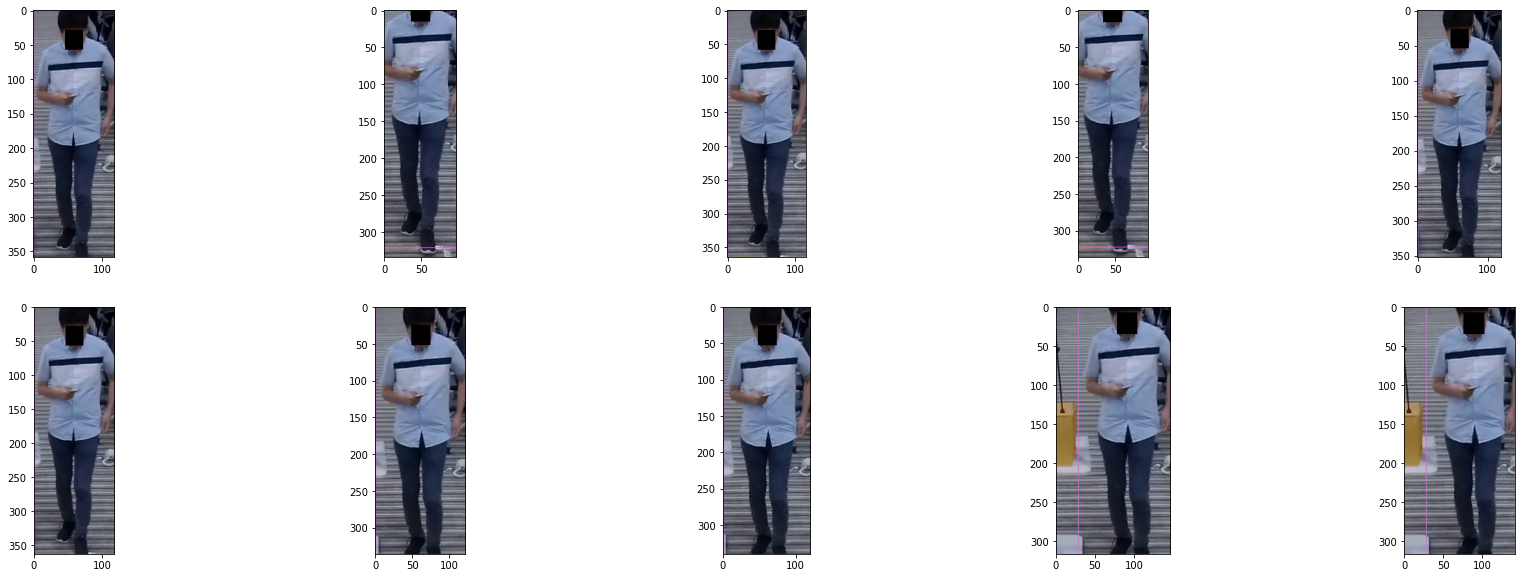

In [105]:
plt.figure(figsize=(30,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    data = p_path+"/"+g3[i]
    print(data)
    img = mpimg.imread(data)
    plt.imshow(img)

/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_7.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_13_person_8.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_7.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_1_person_8.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_6_person_9.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_7_person_9.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_0_person_8.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_2_person_9.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_5_person_9.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_4_person_9.jpg


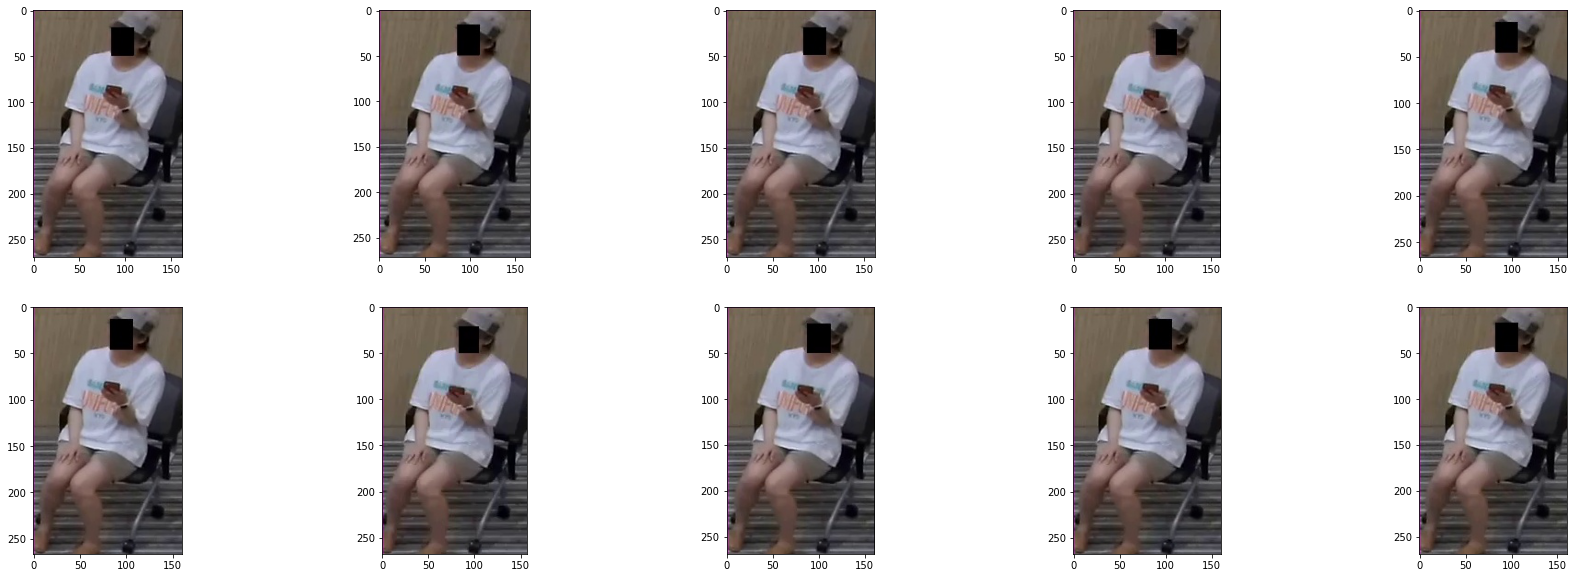

In [101]:
plt.figure(figsize=(30,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    data = p_path+"/"+g4[i]
    print(data)
    img = mpimg.imread(data)
    plt.imshow(img)
    



/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_2.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_7.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_6.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_2.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_6.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_7.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_3_person_7.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_4_person_7.jpg


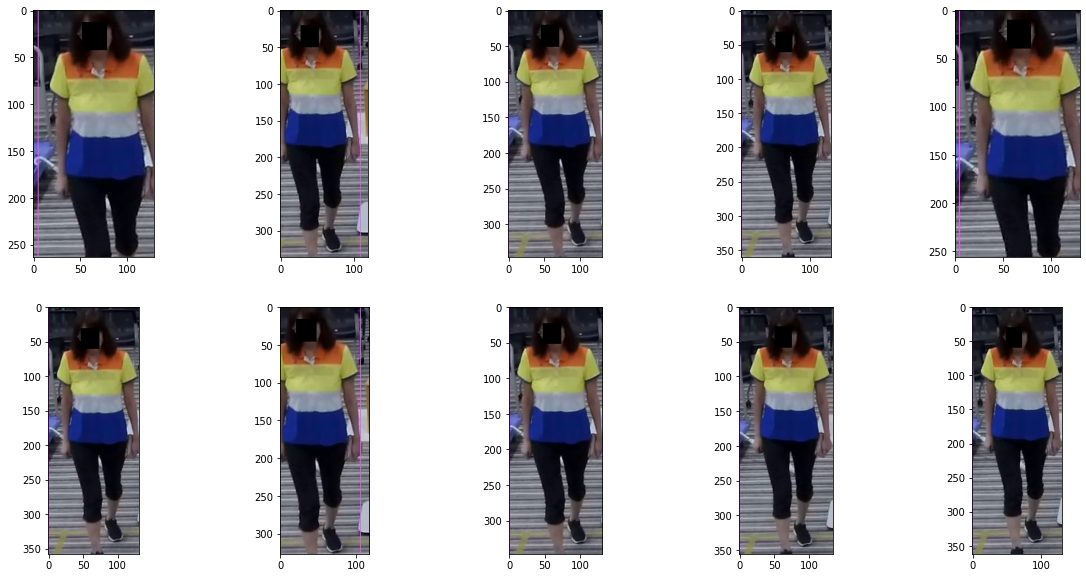

In [99]:
plt.figure(figsize=(20,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    data = p_path+"/"+g0[i]
    print(data)
    img = mpimg.imread(data)
    plt.imshow(img)
    




# writing as file json file clustering result

In [145]:
with open('./clustering_result_fixed.json','w') as f:
    json.dump(groups_fixed,f)

In [146]:
with open("clustering_result_fixed.json", "r") as st_json:

    st_python = json.load(st_json)





In [147]:
from pprint import pprint

In [148]:
pprint(st_python)

{'0': ['frame_9_person_2.jpg',
       'frame_8_person_7.jpg',
       'frame_11_person_5.jpg',
       'frame_8_person_6.jpg',
       'frame_8_person_2.jpg',
       'frame_9_person_6.jpg',
       'frame_9_person_7.jpg',
       'frame_10_person_5.jpg',
       'frame_3_person_7.jpg',
       'frame_4_person_7.jpg',
       'frame_6_person_8.jpg',
       'frame_5_person_2.jpg',
       'frame_2_person_2.jpg',
       'frame_5_person_7.jpg',
       'frame_2_person_7.jpg',
       'frame_7_person_8.jpg',
       'frame_3_person_2.jpg',
       'frame_4_person_2.jpg',
       'frame_0_person_6.jpg',
       'frame_5_person_8.jpg',
       'frame_2_person_8.jpg',
       'frame_0_person_7.jpg',
       'frame_7_person_7.jpg',
       'frame_6_person_2.jpg',
       'frame_3_person_8.jpg',
       'frame_4_person_8.jpg',
       'frame_6_person_7.jpg',
       'frame_1_person_7.jpg',
       'frame_1_person_6.jpg',
       'frame_7_person_2.jpg',
       'frame_15_person_5.jpg',
       'frame_12_person_5.jpg',
    